# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install packages

In [4]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 5.4MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702118 sha256=2f2b4a56419859fa7317643782028b92b22d63655d5f03b7a2bd97359d48e6de
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj


In [5]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (174 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [6]:
!pip install pandana==0.5.1

     |████████████████████████████████| 419kB 4.1MB/s 
  Created wheel for pandana: filename=pandana-0.5.1-cp36-cp36m-linux_x86_64.whl size=1330606 sha256=0926e033ae30b5bb06f598ede5ef1cb09d7478910c4e17605fa48f6efb77e27b
  Stored in directory: /root/.cache/pip/wheels/97/9e/69/0ef74cbc869f3e5f7eb045bcc8d752d49d4d0a07be0a208d76
Successfully built pandana


In [7]:
!pip install osmnet

     |████████████████████████████████| 972kB 6.1MB/s 
     |████████████████████████████████| 6.5MB 14.9MB/s 
     |████████████████████████████████| 14.8MB 335kB/s 
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


# Import libraries

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import pandana, matplotlib.pyplot as plt
from pandana.loaders import osm
%matplotlib inline

In [10]:
import pandas as pd
import numpy as np
import geopy

# Initialize variables

In [11]:
#@title Bounding Box fields

lat_min = 14.34803 #@param {type:"number"}
lng_min = 120.906221 #@param {type:"number"}
lat_max = 14.785335 #@param {type:"number"}
lng_max = 121.134965 #@param {type:"number"}

bbox = [lat_min,lng_min,lat_max,lng_max]

In [12]:
#@title Place Category/Amenity
amenity = 'police' #@param ["bank", "hospital", "police"]{allow-input: true}

In [13]:
#@title Max Distance (in meters)
distance = 500 #@param {type:"integer"}

In [14]:
#@title Location Area Name (for file saving purposes)
place = 'Metro Manila' #@param {type:"string"}

In [15]:
#@title File path (for file saving purposes)
filepath = '/content/drive/My Drive/portfolio/accessibility/' #@param {type:"string"}

# Query the OSM API for the street network within the specified bounding box


In [14]:
network = osm.pdna_network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3])
# how many network nodes did we get for this bounding box?
len(network.node_ids)

/usr/local/lib/python3.6/dist-packages/osmnet/load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](14.34803000,120.90622100,14.78533500,121.13496500);>;);out;'}"
Downloaded 66,424.1KB from www.overpass-api.de in 13.81 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 15.35 seconds
Returning OSM data with 437,821 nodes and 124,249 ways...
Edge node pairs completed. Took 203.37 seconds
Returning processed graph with 162,780 nodes and 225,743 edges...
Completed OSM data download and Pandana node and edge table creation in 227.16 seconds


162780

In [15]:
# Save network
net_nodes = network.nodes_df.to_csv(filepath + 'nodes.csv')
net_edges = network.edges_df.to_csv(filepath + 'edges.csv')

In [16]:
# Load network
nodes = pd.read_csv(filepath + 'nodes.csv', index_col=0)
edges = pd.read_csv(filepath + 'edges.csv', index_col=[0,1])

# nodes =  network.nodes_df
# edges = network.edges_df
network = pandana.Network(nodes['x'], nodes['y'], 
                          edges['from'], edges['to'], edges[['distance']])

## Download points of interest (POIs) and network data from OpenStreetMap

In [17]:
pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags='"amenity"="{}"'.format(amenity))
pois[['amenity', 'name', 'lat', 'lon']].head()

,amenity,name,lat,lon
id,,,,
255049917,police,Makati Police Precint 8,14.549011,121.065257
255049933,police,Police Community Precinct № 2,14.458530,120.970176
255049936,police,Pcp-2,14.663461,120.984020
255050240,police,Police Community Precinct 2,14.581231,121.029830
255051494,police,CAA Police Community Precinct 4,14.457091,120.994751


# Get zipcode using coordinates

In [18]:
!pip install geopy

In [19]:
import geopy
import pandas as pd
import numpy as np

# resolves a pair of coordinates to an address
def get_zipcode(df, geolocator, lat_field, lon_field):
  try:
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.address.split(",")[-2]
  except:
    return None


geolocator = geopy.Nominatim(user_agent='mm_places')

In [20]:
mm_df = network.nodes_df.reset_index()

In [21]:
 df_arrs = np.array_split(mm_df, mm_df.shape[0] // 1000)

In [22]:
%time list_dfs_with_zipcode = [df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='y', lon_field='x') for df in df_arrs[:2]]

CPU times: user 6.42 s, sys: 1.22 s, total: 7.64 s
Wall time: 16min 45s


In [23]:
mm_df['zipcodes'] = pd.concat(list_dfs_with_zipcode)

In [24]:
mm_df.to_csv(filepath+ '{}_network_zipcode_2.csv'.format(place), index=False, encoding='utf-8')

In [25]:
mm_df = pd.read_csv(filepath + 'mm_network_zipcode_2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Process the network data then compute accessibility

In [26]:
# initialize a category for this amenity with the locations specified by the lon and lat columns
network.set_pois(category='my_amenity', maxdist = distance, maxitems = 10, x_col=pois['lon'], y_col=pois['lat'])

In [27]:
# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='my_amenity', num_pois=10)

# each df cell represents the network distance from the node to each of the n POIs
access.head()

,1,2,3,4,5,6,7,8,9,10
id,,,,,,,,,,
12067302,411.216003,431.032990,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
12067330,0.000000,300.384003,385.916992,500.0,500.0,500.0,500.0,500.0,500.0,500.0
12067342,500.000000,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
12067373,303.760010,369.907013,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
12067375,478.135010,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0


In [28]:
access_1 = pd.merge(mm_df,access.reset_index(), on='id')

In [29]:
access_1.head()

,id,x,y,zipcodes,1,2,3,4,5,6,7,8,9,10
0,12067302,120.994972,14.541506,1302,411.216003,431.032990,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
1,12067330,120.987162,14.559650,1004,0.000000,300.384003,385.916992,500.0,500.0,500.0,500.0,500.0,500.0,500.0
2,12067342,120.975541,14.583040,0913,500.000000,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
3,12067373,120.984131,14.583486,1000,303.760010,369.907013,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0
4,12067375,120.985600,14.584279,1000,478.135010,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0


In [29]:
poi_filename = filepath + 'pois_{}_{}.csv'.format(amenity, place)
access.to_csv(poi_filename, index=False, encoding='utf-8')

## Plot the accessibility

In [30]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}

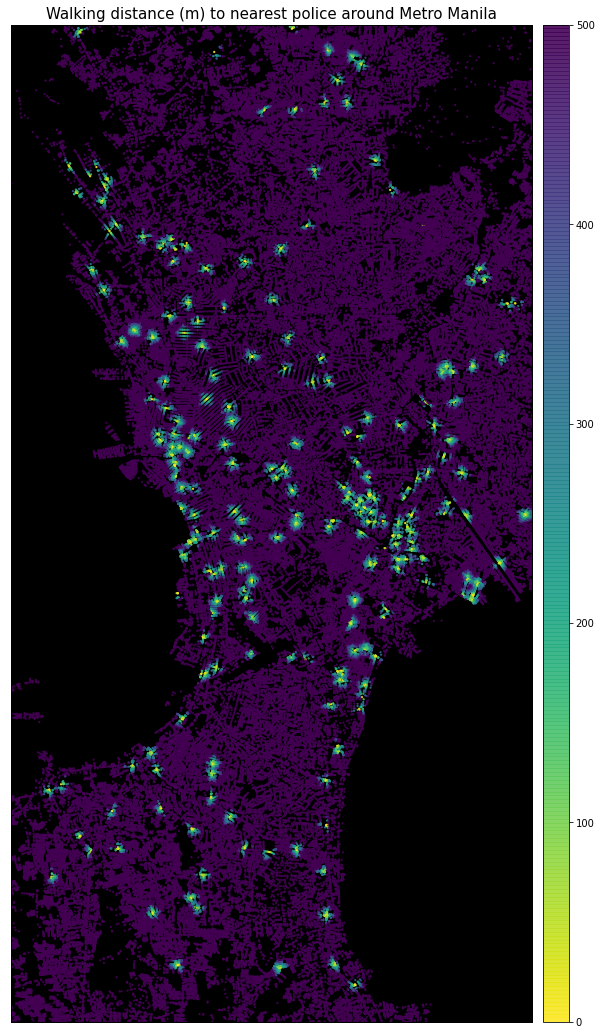

In [31]:
# plot the distance to the nth nearest amenity
n = 1
bmap, fig,ax = network.plot(access[n], bbox=bbox, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
ax.set_facecolor('k')
ax.set_title('Walking distance (m) to nearest {} around Metro Manila'.format(amenity), fontsize=15)
# fig.savefig('images/accessibility-pub-east-bay.png', dpi=200, bbox_inches='tight')
plt.show()

# Merge zipcode and nearest pois

In [32]:
#@title Add new amenity
amenity_2 = 'fire' #@param {type:"string"}

In [33]:
import pandas as pd
police_df = pd.read_csv(filepath + 'pois_police_Metro Manila.csv')
# /content/drive/MyDrive/portfolio/accessibility/pois_fire_station_Metro Manila.csv

In [34]:
police_df.columns = [f"police_{i}" for i in range(1,11)]

In [35]:
mm_df = pd.read_csv(filepath + 'network_zipcode_2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Remove NaN zipcodes

In [36]:
mm_df[mm_df['zipcodes'].isna()]

,id,x,y,zipcodes
361,25006281,121.096238,14.629840,NaN
363,25006460,121.070140,14.604976,NaN
364,25006626,120.995117,14.562618,NaN
371,25007013,120.999119,14.564509,NaN
372,25007285,121.002387,14.601512,NaN
...,...,...,...,...
148397,8099801099,120.932204,14.410709,NaN
148398,8099801101,120.932483,14.411366,NaN
148399,8099801103,120.932400,14.412940,NaN
148400,8099801107,120.932734,14.407865,NaN


In [37]:
zip2_df = mm_df[mm_df['zipcodes'].notna()]

In [38]:
zip2_df.reset_index(drop=True, inplace=True)

In [39]:
zip2_df.tail()

,id,x,y,zipcodes
1994,32096367,121.028740,14.634661,1103
1995,32096368,121.028893,14.635427,1103
1996,32096373,121.026336,14.634057,1103
1997,32096374,121.026215,14.633537,1103
1998,32096486,121.023695,14.632425,1103


### Merge two amenity dataframes

In [103]:
zip2_police_df = pd.merge(zip2_df,police_df,left_index=True, right_index=True)

In [104]:
zip2_police_df.to_csv(filepath + 'zip2_{}_{}.csv'.format(amenity,place), index=False, encoding='utf-8')

In [105]:
add_df = pd.read_csv(filepath + 'pois_{}_{}.csv'.format(amenity_2,place))

In [106]:
zip2_add_df = pd.read_csv(filepath + 'zip2_{}_{}.csv'.format(amenity_2,place))

In [107]:
zip2_add_df = zip2_add_df[[f"{amenity_2}_{i}" for i in range(1,11)]]

In [108]:
zip2_add_police_df = pd.merge(zip2_police_df,zip2_add_df,left_index=True, right_index=True)

In [109]:
zip2_add_police_df.to_csv(filepath + 'zip2_{}_{}_{}.csv'.format(amenity,amenity_2,place), index=False, encoding='utf-8')

# Get nearest police and fire stations

In [110]:
amenities = [amenity, amenity_2]

In [111]:
zip2_add_police_df[['zipcodes'] + [f"{am}_1" for am in amenities]]

,zipcodes,police_1,fire_1
0,1302,411.216003,500.0
1,1004,0.000000,500.0
2,1000,500.000000,500.0
3,1000,303.760010,500.0
4,1000,478.135010,500.0
...,...,...,...
1994,1103,500.000000,500.0
1995,1103,443.928986,500.0
1996,1103,500.000000,500.0
1997,1103,500.000000,500.0


In [112]:
data_first_am_df = zip2_add_police_df[['zipcodes'] + [f"{am}_1" for am in amenities]]
data_first_am_df.columns = [i[:-2] for i in data_first_am_df.columns]

In [113]:
data_first_am_df

,zipcod,police,fire
0,1302,411.216003,500.0
1,1004,0.000000,500.0
2,1000,500.000000,500.0
3,1000,303.760010,500.0
4,1000,478.135010,500.0
...,...,...,...
1994,1103,500.000000,500.0
1995,1103,443.928986,500.0
1996,1103,500.000000,500.0
1997,1103,500.000000,500.0


In [114]:
data_first_am_df['police_score'] = (100 - data_first_am_df['police'] // 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
data_first_am_df['fire_safety_score'] = (100 - data_first_am_df['fire'] // 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
zip_walk_scores_df = data_first_am_df.groupby('zipcod')[['police_score', 'fire_safety_score']].max().reset_index()
zip_walk_scores_df

,zipcod,police_score,fire_safety_score
0,002,67.0,0.0
1,0913,0.0,0.0
2,0921,98.0,5.0
3,1000,93.0,100.0
4,1001,54.0,0.0
...,...,...,...
155,4114,0.0,0.0
156,4811,0.0,0.0
157,626,0.0,0.0
158,7833,95.0,0.0


# Query using zipcode

In [122]:
zip_walk_scores_df[zip_walk_scores_df['zipcod'] == ' 1801']

,zipcod,police_score,fire_safety_score
135,1801,56.0,45.0
